###Libraries you'll likely need

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [4]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [4]:
# Most comments and explanation are given in the pdf file.
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Replacing missing values from " ?" to become np.nan
income94 = income94.replace(" ?", np.nan)
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Replacing zero values in the capital gains/losses to become nan
income94 = income94.replace(0, np.nan)
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 32561 non-null  int64  
 1   workclass           30725 non-null  object 
 2   fnlwgt              32561 non-null  int64  
 3   education           32561 non-null  object 
 4   education_num       32561 non-null  int64  
 5   marital_status      32561 non-null  object 
 6   occupation          30718 non-null  object 
 7   relationship        32561 non-null  object 
 8   race                32561 non-null  object 
 9   sex                 32561 non-null  object 
 10  capital_gain        2712 non-null   float64
 11  capital_loss        1519 non-null   float64
 12  hours_per_week      32561 non-null  int64  
 13  native_country      31978 non-null  object 
 14  gross_income_group  32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+

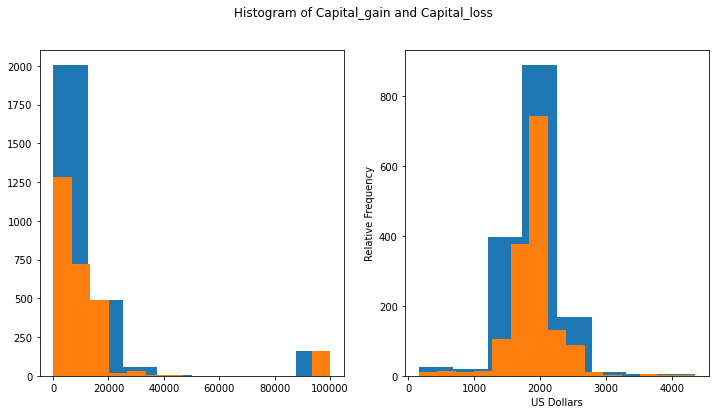

In [9]:
# comment out the plots when not needed using Ctrl + /
fig, (plt1, plt2) = plt.subplots(1, 2)
plt1.hist(income94.capital_gain, bins = 8)
plt1.hist(income94.capital_gain, bins = 15)
plt2.hist(income94.capital_loss, bins = 8)
plt2.hist(income94.capital_loss, bins = 15)
fig.suptitle('Histogram of Capital_gain and Capital_loss')
fig.set_size_inches(12, 6)
plt.xlabel("US Dollars")
plt.ylabel('Relative Frequency')
plt.show()

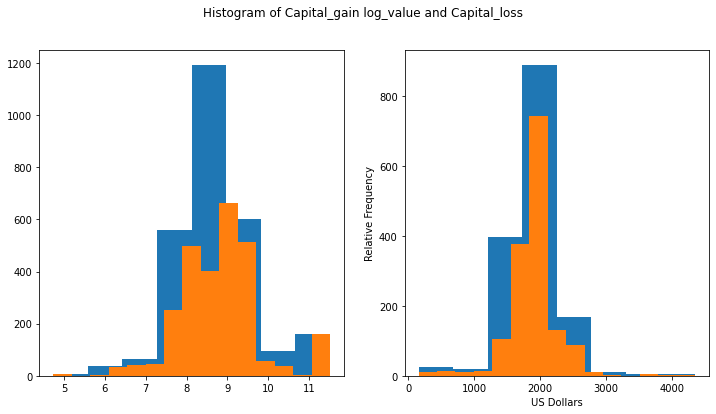

In [10]:
# comment out the plots when not needed using Ctrl + /
fig, (plt1, plt2) = plt.subplots(1, 2)
# plt1 is better with log function
plt1.hist(np.log(income94.capital_gain), bins = 8)
plt1.hist(np.log(income94.capital_gain), bins = 15)
# plt2 is better without log/power function.
plt2.hist((income94.capital_loss), bins = 8)
plt2.hist((income94.capital_loss), bins = 15)
fig.suptitle('Histogram of Capital_gain log_value and Capital_loss')
fig.set_size_inches(12, 6)
plt.xlabel("US Dollars")
plt.ylabel('Relative Frequency')
plt.show()

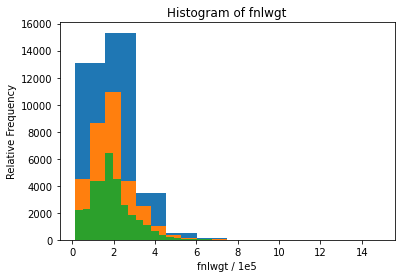

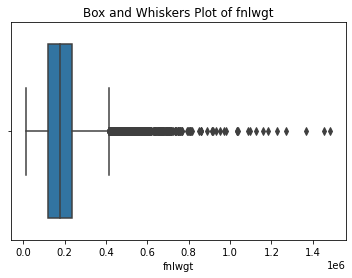

In [11]:
# comment out the plots when not needed using Ctrl + /
plt.hist(income94.fnlwgt / 1e5, bins = 10)
plt.hist(income94.fnlwgt / 1e5, bins = 20)
plt.hist(income94.fnlwgt / 1e5, bins = 40)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt / 1e5')
plt.ylabel('Relative Frequency')
plt.show()

sns.boxplot(x = 'fnlwgt', data = income94)
plt.title('Box and Whiskers Plot of fnlwgt')
plt.show()

In [16]:
# function to get and we will remove outliers by setting it to nan.
def get_outliers(variable, df):
  firstquart = df[variable].quantile(q=0.25)
  thirdquart = df[variable].quantile(q=0.75)
  iqr = thirdquart - firstquart
  lower_whisker = firstquart - 1.51*iqr
  upper_whisker = thirdquart + 1.51*iqr
  outliers = df[(df[variable] >= upper_whisker) | (df[variable] <= lower_whisker)]
  return outliers
outliers = get_outliers('fnlwgt', income94)
income94['fnlwgt'].loc[outliers.index] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


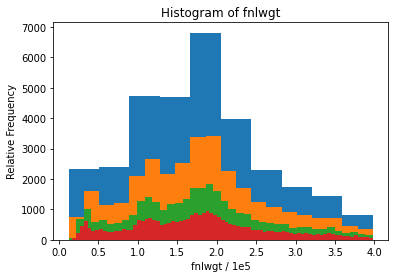

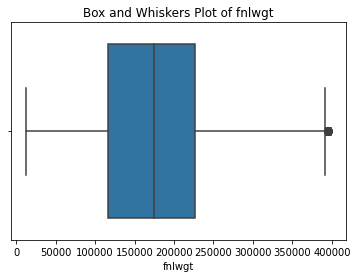

In [17]:
# comment out the plots when not needed using Ctrl + /
plt.hist(income94.fnlwgt / 1e5, bins = 10)
plt.hist(income94.fnlwgt / 1e5, bins = 20)
plt.hist(income94.fnlwgt / 1e5, bins = 40)
plt.hist(income94.fnlwgt / 1e5, bins = 80)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt / 1e5')
plt.ylabel('Relative Frequency')
plt.show()

sns.boxplot(x = 'fnlwgt', data = income94)
plt.title('Box and Whiskers Plot of fnlwgt')
plt.show()

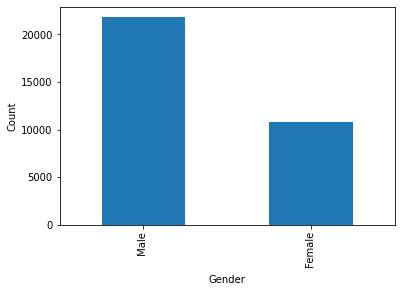

In [18]:
# Gender Counts in the dataset.
income94["sex"].value_counts().plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [19]:
# creating 2 new datasets for easier use in the future
income94m = income94[income94.sex == " Male"]
income94f = income94[income94.sex == " Female"]
income94m

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,13,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,NaN,40,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,40,United-States,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138.0,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,NaN,NaN,11,Taiwan,<=50K
32554,53,Private,321865.0,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,40,United-States,>50K
32555,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,NaN,NaN,40,United-States,<=50K
32557,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States,>50K


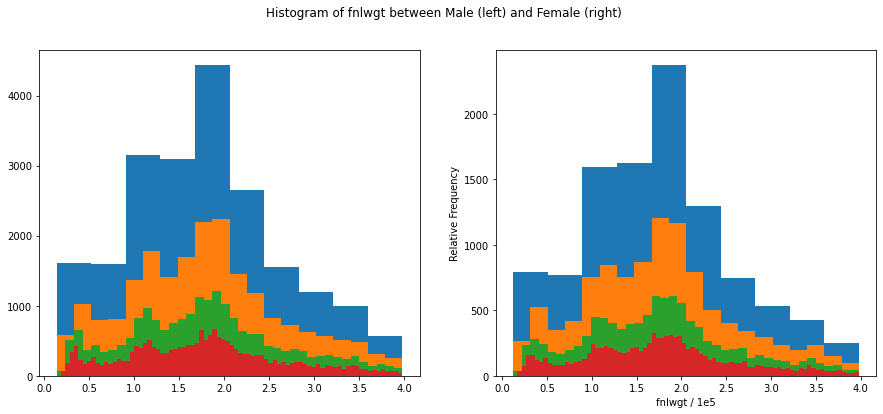

In [20]:
fig, (plt1, plt2) = plt.subplots(1,2)
plt1.hist(income94m.fnlwgt / 1e5, bins = 10)
plt1.hist(income94m.fnlwgt / 1e5, bins = 20)
plt1.hist(income94m.fnlwgt / 1e5, bins = 40)
plt1.hist(income94m.fnlwgt / 1e5, bins = 80)

plt2.hist(income94f.fnlwgt / 1e5, bins = 10)
plt2.hist(income94f.fnlwgt / 1e5, bins = 20)
plt2.hist(income94f.fnlwgt / 1e5, bins = 40)
plt2.hist(income94f.fnlwgt / 1e5, bins = 80)
plt.xlabel('fnlwgt / 1e5')
plt.ylabel('Relative Frequency')
fig.suptitle('Histogram of fnlwgt between Male (left) and Female (right)')
fig.set_size_inches(15,6)

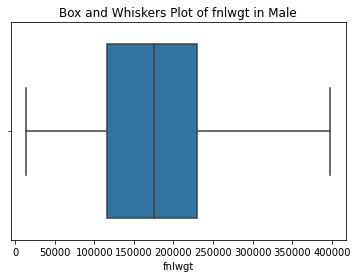

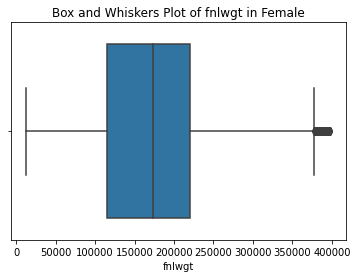

In [21]:
sns.boxplot(x = 'fnlwgt', data = income94m)
plt.title('Box and Whiskers Plot of fnlwgt in Male')
plt.show()
sns.boxplot(x = 'fnlwgt', data = income94f)
plt.title('Box and Whiskers Plot of fnlwgt in Female')
plt.show()

## **Correlation**

In [22]:
# making a dataframe so that the correlation table can be better viewed
income94columns = income94.drop(columns = ["fnlwgt", "capital_gain", "capital_loss"])
income94corr = income94columns.corr("pearson")
income94corr

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


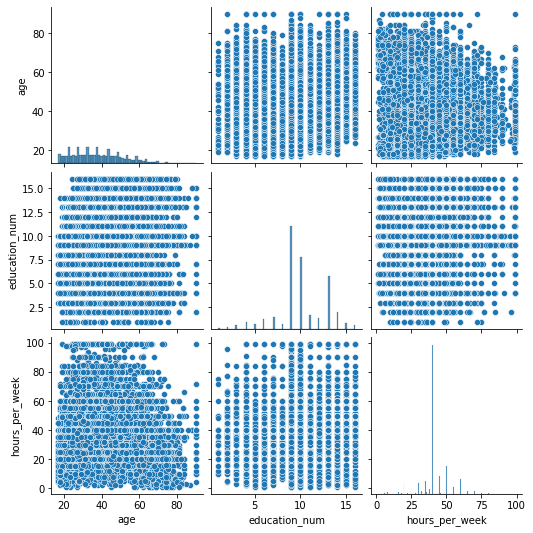

In [136]:
# plotting the pairwise pairs of the dataframe
sns.pairplot(income94[['age', 'education_num', 'hours_per_week']])
plt.show()

In [50]:
# calculating t value for p-value statistics test.
from math import *
n = 32561
correlation = 0.148123
val = sqrt(1 - correlation**2)
t = correlation / val
t *= sqrt(n-2)
t

27.025601789036845

In [32]:
# creating dataframe for male and female and dropping unnecessary columns for better viewing
income94columnsm = income94m.drop(columns = ["fnlwgt", "capital_gain", "capital_loss"])
income94columnsf = income94f.drop(columns = ["fnlwgt", "capital_gain", "capital_loss"])
income94corrm = income94columnsm.corr("pearson")
income94corrf = income94columnsf.corr("pearson")
income94corrm

,age,education_num,hours_per_week
age,1.000000,0.060486,0.034124
education_num,0.060486,1.000000,0.136782
hours_per_week,0.034124,0.136782,1.000000


In [51]:
# calculating t value for p-value statistics test for male
n = 21790
correlation = 0.06
val = sqrt(1 - correlation**2)
t = correlation / val
t *= sqrt(n-2)
t

8.872440064249366

In [45]:
income94corrf

,age,education_num,hours_per_week
age,1.000000,-0.017899,0.081257
education_num,-0.017899,1.000000,0.178749
hours_per_week,0.081257,0.178749,1.000000


In [49]:
# calculating t value for p-value statistics test for female
n = 10771
correlation = -0.0178
val = sqrt(1 - correlation**2)
t = correlation / val
t *= sqrt(n-2)
t

-1.8474662044392975

In [54]:
# dropping the age column for better view.
income94columns = income94columns.drop(columns = ["age"])
income94columns.cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


In [58]:
# Creating a weighted dataframe for covariance and variance comparison.
income94weighted = income94
income94weighted["weighted_hours"] = income94weighted["fnlwgt"] * income94weighted["hours_per_week"] / income94.fnlwgt.median()
income94weighted

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,weighted_hours
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40,United-States,<=50K,17.694485
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,13,United-States,<=50K,6.180623
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,NaN,40,United-States,<=50K,49.225256
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,40,United-States,<=50K,53.579483
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN,NaN,40,Cuba,<=50K,77.248220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38,United-States,<=50K,55.797320
32557,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States,>50K,35.238769
32558,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40,United-States,<=50K,34.676315
32559,22,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,NaN,NaN,20,United-States,<=50K,22.996941


In [57]:
# Filtering out columns for better view
income94columnsweighted =  income94weighted.drop(columns = ["fnlwgt", "capital_gain", "capital_loss", "age", "hours_per_week"])
income94columnsweighted.cov()

,education_num,weighted_hours
education_num,6.618890,3.163654
weighted_hours,3.163654,550.177754


In [59]:
income94columnsweighted.corr()

,education_num,weighted_hours
education_num,1.000000,0.052672
weighted_hours,0.052672,1.000000


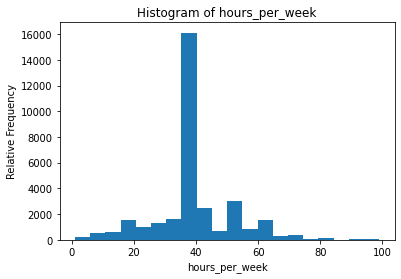

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [96]:
plt.hist(income94columns["hours_per_week"], bins = 20)
plt.title('Histogram of hours_per_week')
plt.xlabel('hours_per_week')
plt.ylabel('Relative Frequency')
plt.show()
income94columns["hours_per_week"].describe()

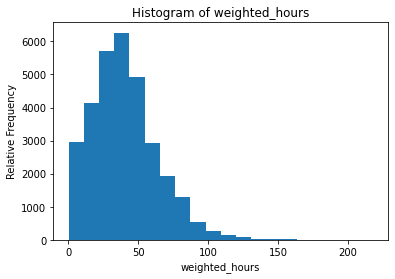

count    31264.000000
mean        40.361873
std         23.455868
min          0.318343
25%         23.370939
50%         38.235970
75%         53.081753
max        217.826105
Name: weighted_hours, dtype: float64

In [97]:
plt.hist(income94columnsweighted["weighted_hours"] , bins = 20)
plt.title('Histogram of weighted_hours')
plt.xlabel('weighted_hours')
plt.ylabel('Relative Frequency')
plt.show()
income94columnsweighted["weighted_hours"].describe()

## **Regression**

In [90]:
# Creating 1 independent variable linear regression with OLS method
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:58:44   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

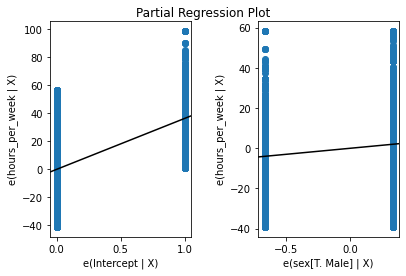

In [102]:
# Graph for review and making sure the equation is as expected.
fig = sm.graphics.plot_partregress_grid(reg1)
fig.tight_layout(pad=2.0)

In [91]:
# Creating 2 independent variable linear regression with OLS method
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:58:46   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

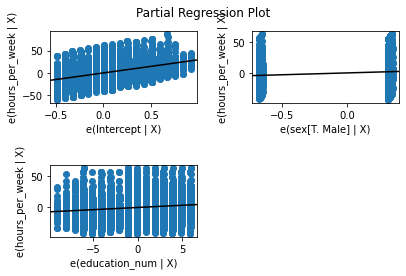

In [92]:
# Graph for review and making sure the equation is as expected.
fig = sm.graphics.plot_partregress_grid(reg2)
fig.tight_layout(pad=2.0)

In [94]:
# Creating 3 independent variable linear regression with OLS method
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:58:57   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

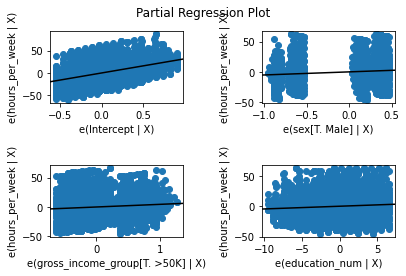

In [101]:
# Graph for review and making sure the equation is as expected.
fig = sm.graphics.plot_partregress_grid(reg3)
fig.tight_layout(pad=2.0)